# Основы работы с количественными данными

*Алла Тамбовцева*

## Практикум 6. Выявление связей в качественных и количественных данных

Импортируем библиотеку `pandas` и модуль `stats` для статистических тестов:

In [1]:
import pandas as pd
import scipy.stats as st

### Часть 1: выявление связей в качественных данных

Завершаем историю с занимательной антропологией и сказочным опросом. Данные за неделю успели существенно подкопиться, поэтому давайте загрузим данные из нового файла (помимо новых наблюдений добавлены новые столбцы, необходимые для анализа данных в рамках этого практикума, чтобы не писать много непонятного кода самим):

In [2]:
# загружаем данные с первого листа
# sheet_name = 0, нумерация с нуля

end = pd.read_excel("NPK_final 2.xlsx", sheet_name = 0)
end.head()

,id,опрос,профиль,пол,выбор1,выбор2,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла,герои_пол
0,35,4,политология и управление,жен,Альбина,Флора,0,1,1,0,0,0,0,0,0,0,жен
1,36,4,политология и управление,жен,Давиль,Жак,0,0,0,0,0,1,0,1,0,0,муж
2,37,4,политология и управление,жен,Жак,NaN,0,0,0,0,0,0,0,1,0,0,муж
3,38,4,политология и управление,жен,Патрик,Пенапью,0,0,0,1,1,0,0,0,0,0,муж
4,39,4,политология и управление,муж,Давиль,Оттилия,0,0,0,0,0,1,1,0,0,0,смеш


Так как номер опроса здесь числовой (что не совсем правда с содержательной точки зрения), давайте изменим его на текстовый – просто глобально поменяем тип столбца:

In [3]:
# выбираем столбец "опрос" из таблицы end
# astype() меняет тип
# здесь меняем числовой на текстовый – str, string

end["опрос"] = end["опрос"].astype(str)

Отлично, теперь бессодержательный числовой столбец нам не мешается, с оставшимися столбцами из 0 и 1 можно поработать. Вспомним про суммирование 0 и 1 и сортировку:

In [4]:
# считаем суммы по всем столбцам в end
# только по числовым numeric_only = True
# сортируем по убыванию ascending = False

end.sum(numeric_only = True).sort_values(ascending = False)

Патрик      37
Давиль      36
Жак         36
Марта       32
Альбина     25
Оттилия     24
Марселла    17
Пенапью     16
Флора       15
Теодор      11
dtype: int64

А заодно и про группировку с агрегированием:

In [5]:
# группируем по полу и считаем суммы по каждой группе
# numeric_only = True – для страховки, в новой версии
# pandas ругается и просит сначала отобрать числовые столбцы

res01 = end.groupby("пол").agg("sum", numeric_only = True)
res01

,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла
пол,,,,,,,,,,
жен,6,14,13,15,7,10,19,18,22,9
муж,5,0,9,21,9,23,3,15,8,7


Таблица выше – готовая **таблица сопряженности** («сопрягаем» два признака, пол и выбор героя = архетипа), поэтому давайте воспользуемся **критерием хи-квадрат** для проверки наличия связи между признаками:

In [6]:
# из модуля st вызываем функцию chi2_contingency()
# contingency table – таблица сопряженности,
# таблицу сопряженности res01 подаем на вход

st.chi2_contingency(res01)

Chi2ContingencyResult(statistic=35.928703520164056, pvalue=4.081823446040576e-05, dof=9, expected_freq=array([[ 6.27896996,  7.99141631, 12.55793991, 20.54935622,  9.13304721,
        18.83690987, 12.55793991, 18.83690987, 17.12446352,  9.13304721],
       [ 4.72103004,  6.00858369,  9.44206009, 15.45064378,  6.86695279,
        14.16309013,  9.44206009, 14.16309013, 12.87553648,  6.86695279]]))

Итак, давайте разберемся с выдачей и результатами. Начнем с того, какую гипотезу мы проверяли:
    
$$
H_0: \text{связи нет, признаки независимы}
$$
    
$$
H_1: \text{связь есть, признаки не независимы}
$$
    
Для проверки этой гипотезы вы воспользовались критерием хи-квадрат, по итогу проверки получили **p-value** как меру жизнеспособности нулевой гипотезы с точки зрения данных. Здесь p-value – это второе число в выдаче, то есть, pvalue = 4.08e-05 = $4.08 \times 10^{-05}$, что примерно 0. На 5%-ном уровне значимости гипотезу можно отвергнуть, а значит, связь между предпочтениями героев и полом существует.

Это p-value было посчитано на основе **наблюдаемого значения статистики критерия**, оно в выдаче тоже есть, здесь `statistic=35.9287`. То есть, p-value было получено как $P(\text{statistic} > 35.9287)$. Эта вероятность посчитана с учетом свойств распределения хи-квадрат, используемого для работы с данными на основе нашей таблицы сопряженности `res01`. В частности, чтобы такую вероятность посчитать, нужно знать важный параметр – **число степеней свободы**, в выдаче оно также присутствует, это `dof = 9` (от *degrees of freedom*). Считается оно так:

$$
\text{dof} = (r - 1)(c - 1),
$$

где $r$ – число строк в таблице сопряженности, $c$ – число столбцов в таблице сопряженности. Здесь получаем:

$$
\text{dof} = (2 - 1)(10 - 1) = 9.
$$

Наконец, последний элемент в выдаче – это массив `expected_freq` с таблицей **ожидаемых частот**, то есть тех значений в таблице сопряженности, которые можно ожидать в случае, если нулевая гипотеза верна и признаки действительно независимы. Например, в случае, если выбор героя от пола не зависит, мы можем ожидать, что короля Теодора выберут 6 девушек (значение 6.27 в первом списке) и 5 юношей (значение 4.72 во втором списке), а королеву Флору 8 девушек (значение 7.99 в первом списке) и 6 юношей (значение 6.00 во втором списке). Любопытно, что в случае с Теодором у нас так и получилось, в самой таблице сопряженности `res01` наблюдаемые частоты тоже 6 и 5, то есть выбор этого героя от пола точно не зависит. А вот с Флорой не так, 14 против ожидаемых 8 у девушек и 0 против ожидаемых 6 у юношей. Значит, выбор этого героя от пола все же зависит, девушки выбирают королеву чаще. Именно на основе сравнений наблюдаемых и ожидаемых частот и считается значение статистики `statistic` и p-value, вспомните лекцию.

Как быть, если у нас нет готовых 0 и 1 в столбцах, а есть просто два столбца с текстом? Как здесь, например, столбцы `пол` и `герои_пол`? Построить таблицу сопряженности через функцию `crosstab()`:

In [7]:
# crosstab – перекрестная таблица

res02 = pd.crosstab(end["пол"], end["герои_пол"])
res02

герои_пол,жен,муж,смеш
пол,,,
жен,25,15,29
муж,5,29,22


Эта таблица показывает, героев какого пола выбирали девушки и юноши. Так как можно было выбрать двоих, здесь три категории: `муж` (оба героя мужского пола), `жен` (оба героя женского пола), `смеш` (герои разного пола).

И к такой таблице тоже можно применить критерий хи-квадрат и функцию `chi2_contingency()`!

In [8]:
st.chi2_contingency(res02)

Chi2ContingencyResult(statistic=17.586882826253035, pvalue=0.00015172492005852153, dof=2, expected_freq=array([[16.56 , 24.288, 28.152],
       [13.44 , 19.712, 22.848]]))

Что есть что в таких выдачах мы уже разобрали, поэтому здесь посмотрим только на p-value, оно примерно 0.0002, значит, гипотезу о независимости признаков мы отвергаем. Связь есть, и мы видим по таблице, что девушкам интересны герои женского пола, а юношам – герои мужского пола.

### Часть 2: выявление связей в количественных данных

Возвращаемся к данным по квартирам в Москве, этот CSV-файл мы уже видели в начале курса:

In [9]:
flats = pd.read_csv("flats.csv")
flats.head()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
0,730,134,102,10.0,9.0,10,1,1,1
1,477,119,93,15.0,9.0,1,1,0,1
2,350,80,44,14.0,10.5,10,1,1,0
3,410,102,75,10.0,6.5,5,1,1,1
4,50,63,47,7.0,12.0,20,0,1,0


Построим **диаграмму рассеивания** (она же *scatterplot*) для визуализации связи между жилой площадью квартиры (`livesp`) и ее ценой (`price`):

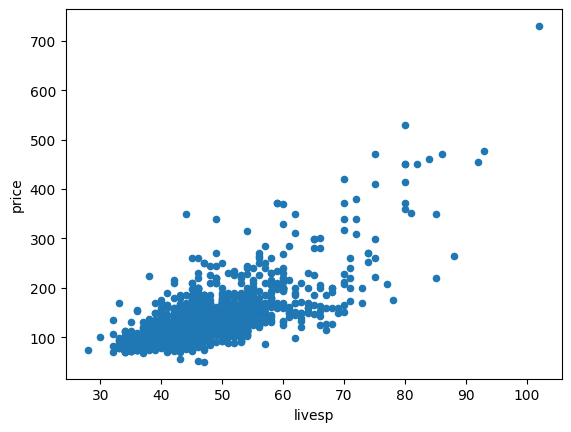

In [10]:
# строим график по таблице flats
# после названия добавляем модуль plot для графиков
# а после plot – название конкретного графика

flats.plot.scatter(x = "livesp", y = "price");

По диаграмме видно, что связь между показателями есть, чем больше площадь, тем выше цена. При этом есть нетипичное наблюдение, точка, которая отличается от остального облака точек, это квартира с очень большой площадью более 100 квадратных метров и очень высокой ценой более 700 тысяч долларов. Теоретически, эта точка может искажать оценки силы связи между показателями, но в данном случае несильно, потому что от основного массива это наблюдение отличается не очень радикально.

Немного доработаем диаграмму:

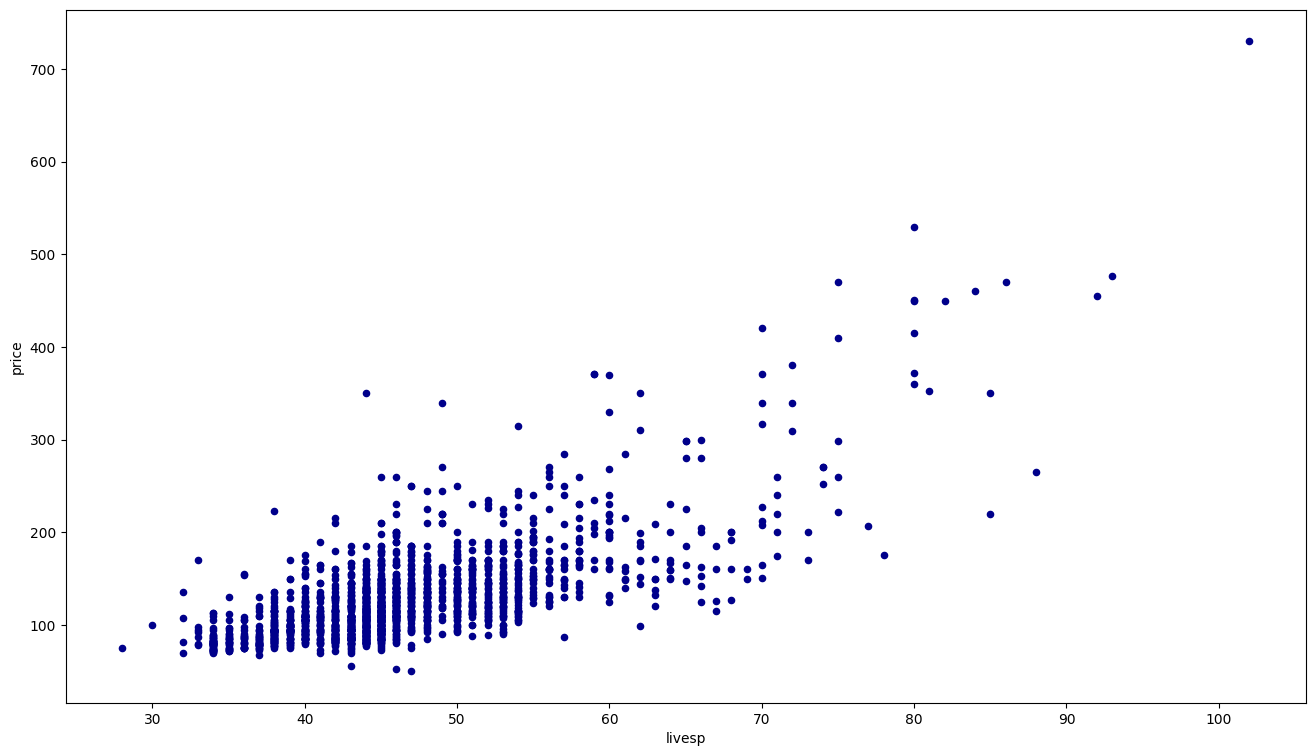

In [11]:
# figsize = (16, 9): размер картинки 16 на 9 дюймов
# color: цвет точек

flats.plot.scatter(x = "livesp", y = "price",
                   figsize = (16, 9),
                   color = "darkblue");

При желании можем сделать цвет точек зависимым от какого-то третьего показателя, например, от расстояния до центра, и задействовать при этом какую-нибудь готовую цветовую палитру (ознакомиться с набором палитр можно [здесь](https://matplotlib.org/stable/users/explain/colors/colormaps.html)):

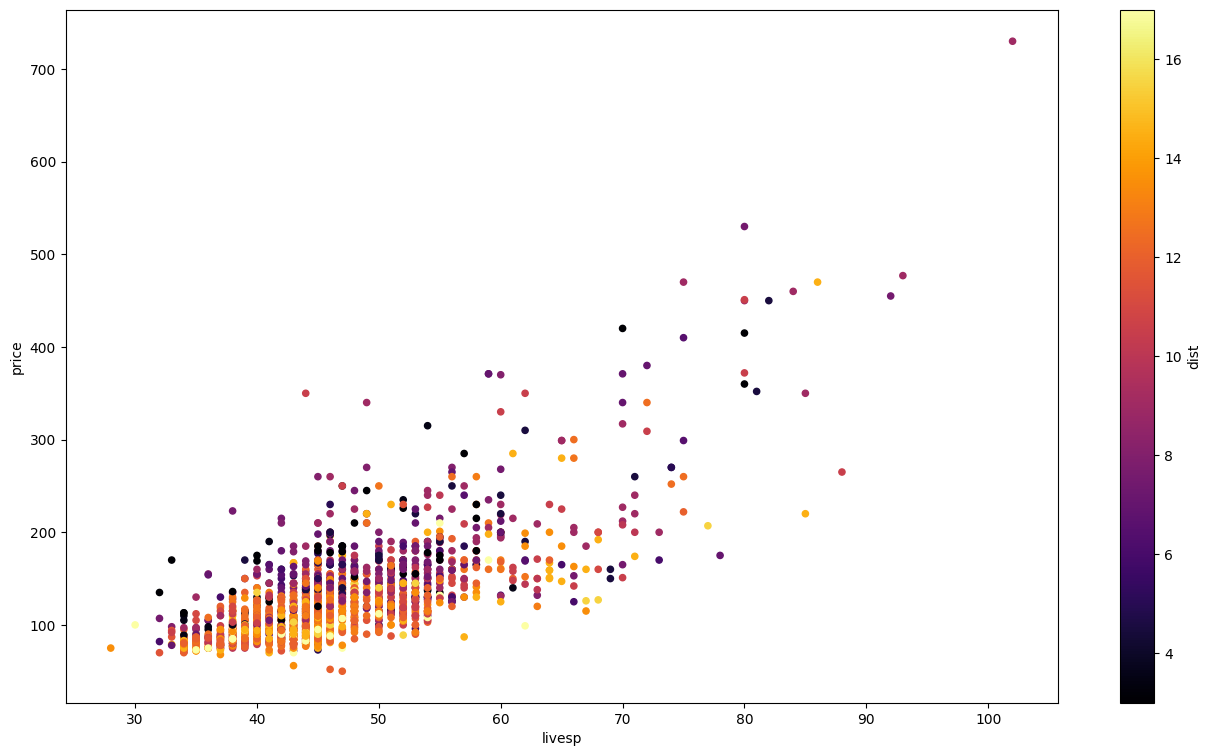

In [12]:
# c: категория, от которой зависит цвет
# colormap: название палитры для цвета точек

flats.plot.scatter(x = "livesp", y = "price",
                   figsize = (16, 9),
                   c = "dist",
                   colormap = "inferno");

Перейдем к коэффициентам корреляции. Сначала вычислим **коэффициент корреляции Пирсона** и сразу проверим его значимость:

In [13]:
# функция pearsonr()
# на вход подаем два столбца/массива

st.pearsonr(flats["livesp"], flats["price"])

PearsonRResult(statistic=0.7296136021085436, pvalue=0.0)

Итак, гипотезы:

$$
H_0: R = 0 \text{ (линейной связи нет)}
$$
$$
H_1: R \ne 0 \text{ (линейная связь есть)}
$$

Функция возвращает нам два значение, первое – это сам **коэффициент корреляции Пирсона**, второе – p-value как результат проверки гипотезы об отсутствии связи. Коэффициент корреляции здесь 0.73, что говорит:

* о прямой связи (коэффициент положительный), то есть с увеличением площади цена квартиры растет;
* о средней связи, близкой к сильной (нет соглашения, кто-то с 0.8 считает сильной, кто-то с 0.7).

Так как **p-value** здесь 0, нулевую гипотезу об отсутствии связи мы отвергаем, связь есть.

Теперь посмотрим на **коэффициент корреляции Спирмена** – здесь актуально, так как есть наблюдение, похожее на потенциальный выброс:

In [14]:
# функция spearmanr()
# на вход подаем два столбца/массива

st.spearmanr(flats["livesp"], flats["price"])

SignificanceResult(statistic=0.6719528164535414, pvalue=4.2078927692311706e-268)

В целом, история похожая, тоже тестируется гипотеза об отсутствии связи, только линейная связь уже не упоминается, это коэффициент, работающий с рангами наблюдений:

$$
H_0: \text{ связи нет, признаки независимы}
$$
$$
H_1: \text{ связь есть, признаки не независимы}
$$

P-value здесь почти 0, гипотеза вновь отвергается, но коэффициент Спирмена чуть ниже коэффициента Пирсона, он не так сильно реагирует на ту нехарактерную точку, которая «перетягивает» облако точек на себя, заставляя считать наклон облака рассеяния более крутым, чем есть на самом деле без учета этой точки.

Попробуем выкинуть нехарактерное наблюдение – квартиру с очень высокой ценой и такой же высокой площадью:

In [15]:
# отбираем строки с price < 700
# flats["price"] < 700 дает набор из True и False,
# условие проверяется для каждой ячейки в столбце,
# затем отбирает те строки, где вернулось True

flats_new = flats[flats["price"] < 700]

И пересчитать коэффициенты:

In [16]:
st.pearsonr(flats_new["livesp"], flats_new["price"])

PearsonRResult(statistic=0.7223104192359445, pvalue=0.0)

In [17]:
st.spearmanr(flats_new["livesp"], flats_new["price"])

SignificanceResult(statistic=0.6714685038672935, pvalue=1.9024218545550169e-267)

В нашем случае изменений не наблюдается, все-таки это не совсем типичное наблюдение оказалось не таким влиятельным.